<h1 style="color:green; text-align:center;"> Exercise 4 - Pandas </h1> 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

### Dataset
Red tides are caused by Karenia brevis harmful algae blooms. For Karenia brevis cell count data, you can use the [current dataset](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0120767) of Physical and biological data collected along the Texas, Mississippi, Alabama, and Florida Gulf coasts in the Gulf of Mexico as part of the Harmful Algal BloomS Observing System from 1953-08-19 to 2023-07-06 (NCEI Accession 0120767). For direct data download, you can use this [data link](https://www.nodc.noaa.gov/archive/arc0069/0120767/7.7/data/0-data/habsos_20230714.csv) and this [data documentation link](https://www.nodc.noaa.gov/archive/arc0069/0120767/7.7/data/0-data/Support%20Documents/).  Alternatively, FWRI documents Karenia brevis blooms from 1953 to the present. The dataset has more than 200,000 records is updated daily. To request this dataset email: HABdata@MyFWC.com. To learn more about this data, check the [FWRI  Red Tide  Red Tide Current Status](https://myfwc.com/research/redtide/statewide/).

### Study areas
Conduct your analysis in Tampa Bay and Charlotte Harbor estuary. For Tampa Bay, restrict the Karenia brevis measurements from 27° N to 28° N and 85° W to coast. For Charlotte Harbor estuary, restrict the Karenia brevis measurements from 25.5° N to less than 27° N and 85° W to coast.

### Problem statement

For each of the two regions, plot the maximum Karenia brevis concentration (i.e., cellcount) per week for the whole study period and for the last 10 years. 

### Exercise

Peform the 10 tasks below. Use of a LLM is permitted. 

#### 1. Import libraries

In [1]:
import pandas as pd

#### 2. Read data from csv file

In [2]:
# Read a csv file with Pandas
df = pd.read_csv('habsos_20230714.csv', low_memory=False)

#### 3. Filter to columns needed for analysis

Select columns that include State ID, description, latitude, longitude, sample date, and cellcount.

In [3]:
#Display columns labels
df.columns

Index(['STATE_ID', 'DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'SAMPLE_DATE',
       'SAMPLE_DEPTH', 'GENUS', 'SPECIES', 'CATEGORY', 'CELLCOUNT',
       'CELLCOUNT_UNIT', 'CELLCOUNT_QA', 'SALINITY', 'SALINITY_UNIT',
       'SALINITY_QA', 'WATER_TEMP', 'WATER_TEMP_UNIT', 'WATER_TEMP_QA',
       'WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'WIND_SPEED',
       'WIND_SPEED_UNIT', 'WIND_SPEED_QA'],
      dtype='object')

In [4]:
# Select column names that you need for your analysis (e.g., 'LATITUDE', 'LONGITUDE', 'SAMPLE_DATE', 'CELLCOUNT', etc.) 
selected_columns = ['STATE_ID','DESCRIPTION','LATITUDE', 'LONGITUDE', 'SAMPLE_DATE', 'CELLCOUNT']

# Filter the DataFrame to include only the selected columns
df = df[selected_columns]

# Display your DataFrame
df

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,CELLCOUNT
0,FL,Bay Dock (Sarasota Bay),27.331600,-82.577900,11/30/2022 18:50,388400000
1,FL,Bay Dock (Sarasota Bay),27.331600,-82.577900,12/9/1994 20:30,358000000
2,FL,Siesta Key; 8 mi off mkr 3A at 270 degrees,27.277200,-82.722300,2/22/1996 0:00,197656000
3,TX,"Windsurfing Flats, Pinell Property, south Padr...",26.162420,-97.182580,10/10/2005 21:21,40000
4,FL,"Lido Key, 2.5 miles WSW of",27.300000,-82.620000,1/2/2019 20:30,186266667
...,...,...,...,...,...,...
205547,MS,5-9A,30.361850,-88.850067,8/25/2020 0:00,0
205548,MS,Katrina Key,30.356869,-88.839592,9/30/2020 0:00,0
205549,MS,Sample* Long Beach,30.346020,-89.141030,1/25/2021 0:00,0
205550,MS,10-Jun,30.343900,-88.602667,11/15/2021 0:00,0


#### 4. Assign region name based on latitude and longitude values. 

First create a new column `REGION` with default value 'Other'. Then use a Boolean mask to change 'Other' in each row to 'Tampa Bay' or 'Charlotte Harbor' based on latitude and longitude values.  You can assign values, i.e., 'Tampa Bay` or 'Charlotte Harbor', uing for example, 
```python
`df.loc[mask, 'column_name'] = 'your_value'
```
Or any other method of your choice. Do it with this method, and ask a LLM to suggest for you other methods. That is a very effective way of learning.

In [5]:
# Create a new column 'region' with default value 'Other'
df['REGION'] = 'Other'

# Mask for dicing: Define mask for Tampa Bay region based on latitude and longitude values
tampa_bay_mask = (df['LATITUDE'] >= 27) & (df['LATITUDE'] <= 28) & (df['LONGITUDE'] >= -85)

# Assign value 'Tampa Bay' to rows matching Tampa Bay mask 
df.loc[tampa_bay_mask, 'REGION'] = 'Tampa Bay'

# Mask for decing: Define mask for Charlotte Harbor estuary region  based on latitude and longitude values
charlotte_harbor_mask = (df['LATITUDE'] >= 25.5) & (df['LATITUDE'] < 27) & (df['LONGITUDE'] >= -85)

# Assign value 'Charlotte Harbor' to rows matching Charlotte Harbor mask
df.loc[charlotte_harbor_mask, 'REGION'] = 'Charlotte Harbor'

#Display dataframe
df

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,CELLCOUNT,REGION
0,FL,Bay Dock (Sarasota Bay),27.331600,-82.577900,11/30/2022 18:50,388400000,Tampa Bay
1,FL,Bay Dock (Sarasota Bay),27.331600,-82.577900,12/9/1994 20:30,358000000,Tampa Bay
2,FL,Siesta Key; 8 mi off mkr 3A at 270 degrees,27.277200,-82.722300,2/22/1996 0:00,197656000,Tampa Bay
3,TX,"Windsurfing Flats, Pinell Property, south Padr...",26.162420,-97.182580,10/10/2005 21:21,40000,Other
4,FL,"Lido Key, 2.5 miles WSW of",27.300000,-82.620000,1/2/2019 20:30,186266667,Tampa Bay
...,...,...,...,...,...,...,...
205547,MS,5-9A,30.361850,-88.850067,8/25/2020 0:00,0,Other
205548,MS,Katrina Key,30.356869,-88.839592,9/30/2020 0:00,0,Other
205549,MS,Sample* Long Beach,30.346020,-89.141030,1/25/2021 0:00,0,Other
205550,MS,10-Jun,30.343900,-88.602667,11/15/2021 0:00,0,Other


#### 5. Set column with date information as index

Change `SAMPLE_DATE` to datetime format and set is as an index.

In [6]:
# Convert the "SAMPLE_DATE" column to datetime format using pd.to_datetime()
df['SAMPLE_DATE'] = pd.to_datetime(df['SAMPLE_DATE'])

# Set the "SAMPLE_DATE" column as the index of your DataFrame
df.set_index('SAMPLE_DATE', inplace=True)

Sort the index and display min and max index value

In [7]:
#Sort index (optional step)
df.sort_index(inplace=True)

#Display min index value
display(df.index.min())

#Display max index value
display(df.index.max())

Timestamp('1953-08-19 00:00:00')

Timestamp('2023-07-06 16:06:00')

#### 6. Select the data for each region

Create a new DataFrame from for each region: `charlotte_harbor_data` and `tampa_bay_data`. Each DataFrame should contain the maximum cellcount per month for the whole period. 

Start with charlotte harbor region

In [8]:
#Get rows for charlotte harbor region
charlotte_harbor_data = df[df['REGION'] == 'Charlotte Harbor'].copy()

#For these rows, find the maximum cellcount per month for the study period 
charlotte_harbor_data = charlotte_harbor_data['CELLCOUNT'].resample('M').max()

# display data
charlotte_harbor_data

C:\Users\aelshall\AppData\Local\Temp\ipykernel_10432\4247551668.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  charlotte_harbor_data = charlotte_harbor_data['CELLCOUNT'].resample('M').max()


SAMPLE_DATE
1953-08-31      116000.0
1953-09-30           NaN
1953-10-31           NaN
1953-11-30           NaN
1953-12-31           NaN
                 ...    
2023-02-28    55655327.0
2023-03-31    12085102.0
2023-04-30      240128.0
2023-05-31      184500.0
2023-06-30         333.0
Freq: ME, Name: CELLCOUNT, Length: 839, dtype: float64

In [9]:
#Get rows for tampa bay region
tampa_bay_data = df[df['REGION'] ==  'Tampa Bay'].copy()

#For these rows find the maximum cellcount per month for the study period 
tampa_bay_data = tampa_bay_data['CELLCOUNT'].resample('M').max()

# display data
tampa_bay_data

C:\Users\aelshall\AppData\Local\Temp\ipykernel_10432\3546396697.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tampa_bay_data = tampa_bay_data['CELLCOUNT'].resample('M').max()


SAMPLE_DATE
1953-08-31      178000.0
1953-09-30     2444000.0
1953-10-31      140000.0
1953-11-30      392000.0
1953-12-31      580000.0
                 ...    
2023-02-28    35286933.0
2023-03-31     6363000.0
2023-04-30     1023333.0
2023-05-31       89000.0
2023-06-30         667.0
Freq: ME, Name: CELLCOUNT, Length: 839, dtype: float64

#### 7. Plot the data for each region

Use the Pandas plot function to plot the data for each region. If you put the plot commands for each region together in the same code cell, both of them will be plotted on the same graph. 

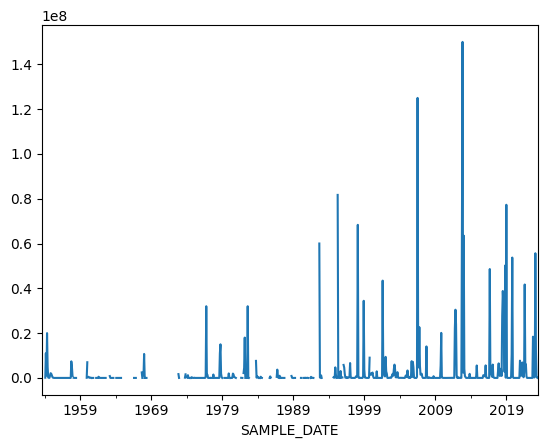

In [10]:
# Plot charlotte harbor data
charlotte_harbor_data.plot();

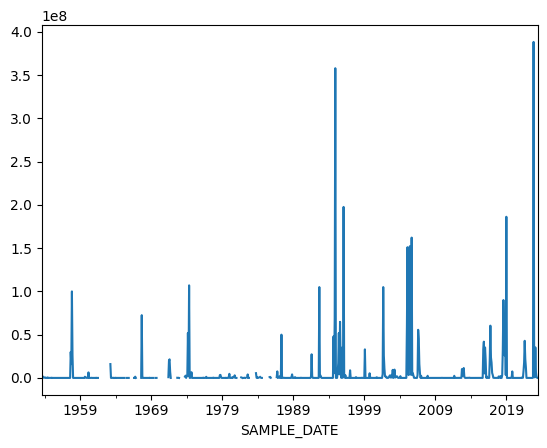

In [11]:
# Plot tampa bay data
tampa_bay_data.plot();

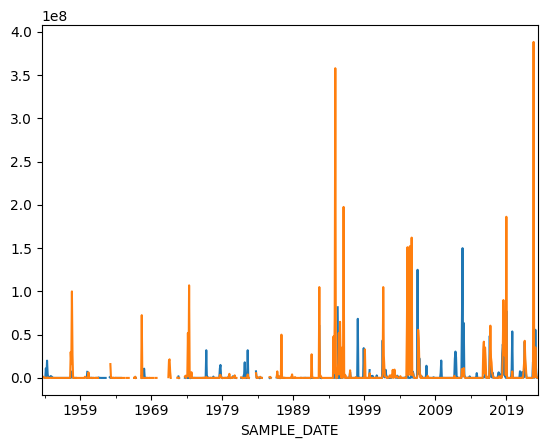

In [12]:
# Plot data for both regions by placing the two plot commands for each region below one another
charlotte_harbor_data.plot();
tampa_bay_data.plot();

Now we have a problem because we do not know which is which. Ask a LLM about how to add a legend for two Pandas plots. 

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    Pandas plot is something quick. Later we will learn how to use matplotlib library to make sophisticated and customized plots. Actually, your LLM may suggest that you use matplotlib because Pandas plot alone may not be able to do this. In that case you may need to install matplotlib with pip install before you use it.</a>
</div>

#### 8. Asking a LLM about adding a legend to two pandas plots

Ask a LLM about how to add legend for two plots when using the plotting tool of pandas.

This is the prompt that I provided to ChatGPT 3.5 Turbo:

> I am doing these two plots with pandas, how to add legend
> ```python
> charlotte_harbor['CELLCOUNT'].resample('Y').max().plot()
> tampa_bay['CELLCOUNT'].resample('Y').max().plot()
> ```

Here is the reponse that I got:

> To add a legend to your plots in Pandas, you can set the `label` parameter within the `plot()` function for each plot, and then call the `legend()` method. Here's how you can do it:
> 
> ---
> ```python
> import matplotlib.pyplot as plt
> 
> # Plot the data
> charlotte_harbor_data.plot(label='Charlotte Harbor')
> tampa_bay_data.plot(label='Tampa Bay')
> 
> # Add legend
> plt.legend()
> 
> # Show the plot
> plt.show()
> ```          
> ---                        
> In this code:   
> - Each plot is labeled using the `label` parameter within the `plot()` function.
> - After plotting both series, `plt.legend()` is called to display the legend.
> - Finally, `plt.show()` is used to show the plot with the legend. Make sure to have `import matplotlib.pyplot as plt` at the beginning of your script or Jupyter Notebook cell.

   
Now let us try this solution

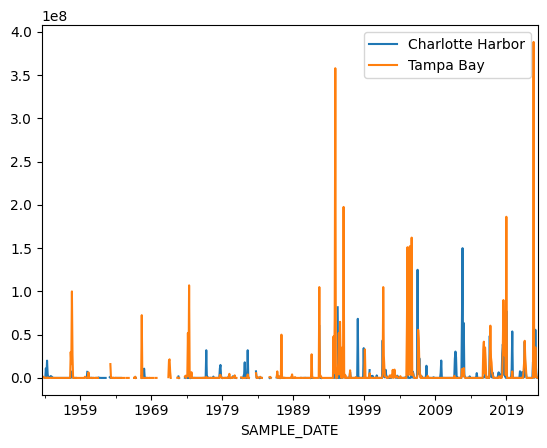

In [13]:
import matplotlib.pyplot as plt

# Plot the data
charlotte_harbor_data.plot(label='Charlotte Harbor')
tampa_bay_data.plot(label='Tampa Bay')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### 9. You can do some cutomization with Pandas plot

Set the size of the figure to (14, 4) inches and add a y-label. Check Section 4.15.4 Customize your Plot in Pandas lesson for details.

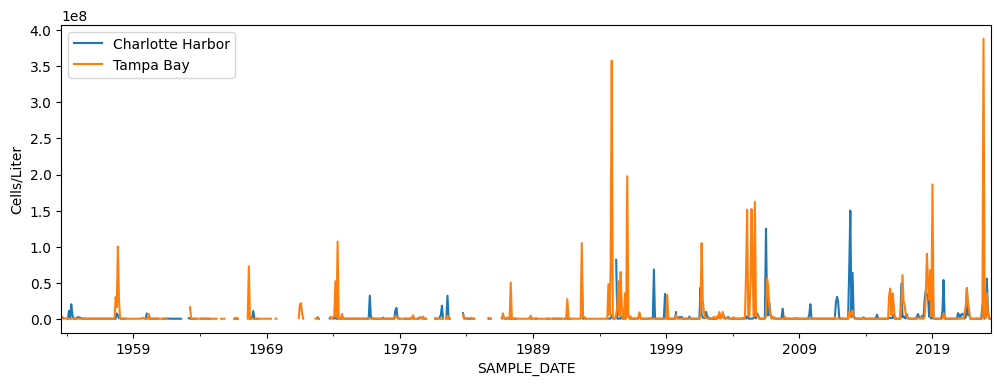

In [14]:
# Plot the data with cutomization 
charlotte_harbor_data.plot(label='Charlotte Harbor',figsize=(12, 4));
tampa_bay_data.plot(label='Tampa Bay',figsize=(12, 4),ylabel='Cells/Liter');

# Add legend
plt.legend()

# Show the plot
plt.show()

#### 10. Which region experienced more severe red tides in the last 10 years? 

To answer this question let use plot the data for the last 10 years.  You can do this with plot cutomization. Check Section 4.15.4 Customize your Plot in Pandas Primer lesson for details.

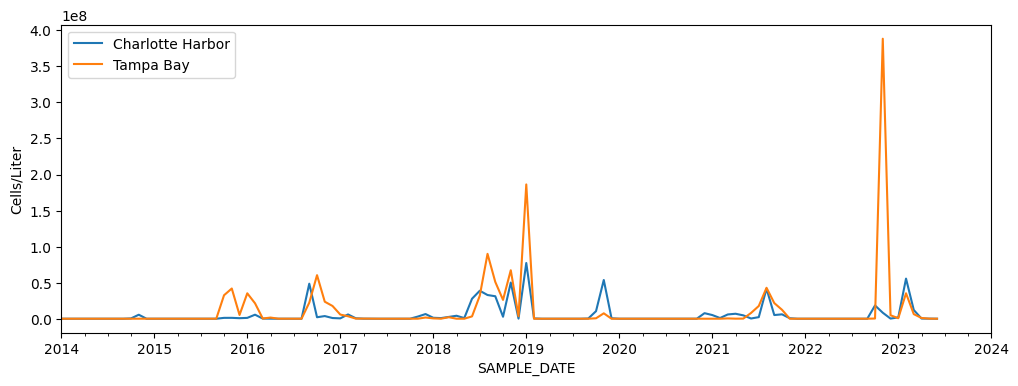

In [15]:
# Plot the data with cutomization 
charlotte_harbor_data.plot(label='Charlotte Harbor',figsize=(12, 4),xlim=('2014-01-01', '2024-01-01'));
tampa_bay_data.plot(label='Tampa Bay',figsize=(12, 4),ylabel='Cells/Liter', xlim=('2014-01-01', '2024-01-01'));

# Add legend
plt.legend()

# Show the plot
plt.show()


**Which region experienced more severe red tides in the last 10 years?**

From the above figure, it is visually unclear which region experienced more severe red tides in the last 10 years. Also, to accurately assess the significance of the data, we need additional information to understand the relationship between cell counts and bloom severity. Moreover, we need to improve our analysis method. Instead of simply finding the maximum concentration per month, we need to develop a more rigorous method to characterize bloom events. That is to get a deeper insights into the dynamics of red tides occurrences and understand data gaps. Finally, we may need to select statistical methods that can help identify patterns, trends, and correlations within the data. Addressing the above limitations in our analysis will allow for better understanding of red tides occurrences and their potential impacts.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    The <a href="https://github.com/plotly/plotly.py">Plotly</a> library in Python enables interactive plotting, allowing users to create figures where they can zoom in and out on specific parts of the data. While we will not cover Plotly this semester, now that you are a Python user, you have the opportunity to explore Plotly's capabilities independently.
</div>